## Data Fields

  * **Survival** - Survival. 0 = No, 1 = Yes
  * **Pclass** - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
  * **Sex** - Sex.
  * **Age** - Age in years.
  * **SibSp** - # of siblings / spouses aboard the Titanic.
  * **Parch** - # of parents / children aboard the Titanic.
  * **Ticket** - Ticket number.
  * **Fare** - Passenger fare.
  * **Cabin** - Cabin number.
  * **Embarked** - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [2]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print(train.index)
print(train.columns)

RangeIndex(start=0, stop=891, step=1)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
train[["Sex", "Pclass", "Survived"]].head()

,Sex,Pclass,Survived
0,male,3,0
1,female,1,1
2,female,3,1
3,female,1,1
4,male,3,0


In [7]:
train.loc[train["Embarked"] == "S"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [8]:
# Bring only those whose fares are $20 or more.
train[train["Fare"] > 20].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train[train["Embarked"].isin(["Q","S"])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [10]:
train[ (train["Age"].isnull()) | (train["Fare"].isnull()) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


## basic operations

In [11]:
test[(test["Fare"].isnull())]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
# ticket average price
print(train["Fare"].mean())
# min
print(train["Fare"].min())
# max
print(train["Fare"].max())
# least age
print(train["Age"].min())
# average
print(train["Age"].mean())
# max
print(train["Age"].max())

# The number of the largest family members
print((train["SibSp"] + train["Parch"] + 1).max())

32.204207968574636
0.0
512.3292
0.42
29.69911764705882
80.0
11


## Add column

In [13]:
train["Nationality_FR"] = train["Embarked"] == "C"

In [14]:
train["Nationality_EN"] = (train["Embarked"] == "S") | (train["Embarked"] == "C" ) 

In [15]:
train["FamilySize"] = (train["SibSp"] + train["Parch"]) + 1
train[["FamilySize", "SibSp", "Parch"]].head()

,FamilySize,SibSp,Parch
0,2,1,0
1,2,1,0
2,1,0,0
3,2,1,0
4,1,0,0


## One-Hot-Encoding

In [16]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

In [17]:
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

## Misssing Value

In [18]:
# Make sure that the average is included in the empty value for age
train.loc[train["Age"].isnull(), "Age"] = train["Age"].mean()

In [19]:
test.loc[test["Age"].isnull(), "Age"] = test["Age"].mean()
test.loc[test["Fare"].isnull(), "Fare"] = test["Fare"].mean()

## Binning

In [20]:
# Categorized into Low, Medium, and High based on ticket price
train["Fare_Low"] = train["Fare"] < 10
train["Fare_Medium"] = (train["Fare"] >= 10) & (train["Fare"] < 50 )
train["Fare_High"] = train["Fare"] >= 50

train[["Fare", "Fare_Low", "Fare_Medium", "Fare_High"]].head()

,Fare,Fare_Low,Fare_Medium,Fare_High
0,7.2500,True,False,False
1,71.2833,False,False,True
2,7.9250,True,False,False
3,53.1000,False,False,True
4,8.0500,True,False,False


In [21]:
train.shape

(891, 21)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Nationality_FR,Nationality_EN,FamilySize,Embarked_C,Embarked_S,Embarked_Q,Fare_Low,Fare_Medium,Fare_High
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,S,False,True,2,False,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,True,True,2,True,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,S,False,True,1,False,True,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,S,False,True,2,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,S,False,True,1,False,True,False,True,False,False


# Feature Selection

In [23]:
feature_names = ["Pclass", "Sex", "Fare",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,7.2500,False,False,True
1,1,1,71.2833,True,False,False
2,3,1,7.9250,False,False,True
3,1,1,53.1000,False,False,True
4,3,0,8.0500,False,False,True


In [24]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Modeling

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=2018)
model

DecisionTreeClassifier(max_depth=3, random_state=2018)

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2018)

In [27]:
# !pip install graphviz

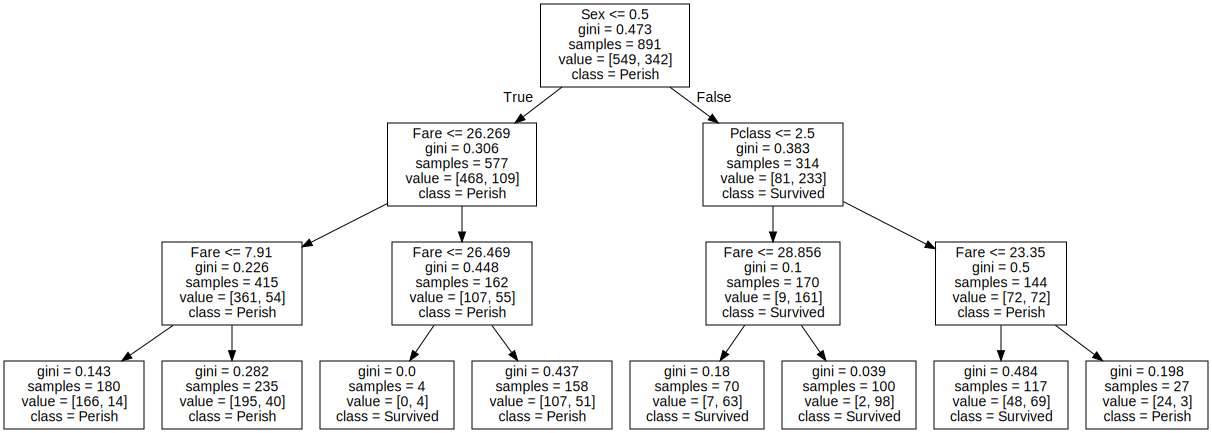

In [28]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [29]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,7.8292,False,True,False
1,3,1,7.0000,False,False,True
2,2,0,9.6875,False,True,False
3,3,0,8.6625,False,False,True
4,3,1,12.2875,False,False,True


In [30]:
prediction = model.predict(X_test)
prediction[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [31]:
test['Survived'] = prediction

In [32]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_S',
       'Embarked_Q', 'Survived'],
      dtype='object')

In [33]:
submission = test[['PassengerId','Survived']]
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [34]:
submission.to_csv("submission.csv", index=False)